In [ ]:
import pandas as pd
import math
import numpy as np
import random

In [82]:
x = np.array([[0,0],[3,5]])
np.sum((x[0]-x[1])**2)

np.int64(34)

In [83]:
def calculate_energy(chain:np.typing.NDArray, sequence):
    energy = 0
    n = len(chain)
    
    for i in range(n):
        for j in range(i + 2, n):
            # Manhattan distance = 1 for grid neighbors
            dist = np.sum(np.abs(chain[i] - chain[j]))
            
            if dist == 1 and sequence[i] == "H" and sequence[j] == "H":
                print(chain[i], chain[j])
                energy -= 1
    return energy

def perturb(chain: np.typing.NDArray):
    chain_cp = chain.copy()
    pivot_index = random.randint(1, len(chain_cp) - 2)
    pivot_point = chain_cp[pivot_index]
    rotation_type = random.choice([90, -90])

    for i in range(pivot_index + 1, len(chain_cp)):
        rel_point = chain_cp[i] - pivot_point

        # Rotation math
        if rotation_type == 90:
            new_x, new_y = -rel_point[1], rel_point[0]
        elif rotation_type == -90:
            new_x, new_y = rel_point[1], -rel_point[0]
        else:
            new_x, new_y = -rel_point[0], -rel_point[1]

        chain_cp[i] = [new_x + pivot_point[0], new_y + pivot_point[1]]

    return chain_cp

def have_collision(chain:np.typing.NDArray):
    unique_beads = np.unique(chain, axis=0)
    return len(unique_beads) < len(chain)

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data(chain:np.typing.NDArray, sequence):
    df = pd.DataFrame( {'x':chain.T[0], 'y':chain.T[1], 'val': [c for c in sequence]} )
    ax = sns.lineplot(data=df, x='x', y='y', sort=False, color='black', alpha=0.5, estimator=None)
    ax.set_aspect('equal', adjustable='datalim')
    sns.scatterplot(data=df, x='x', y='y', hue='val', s=60, zorder=10)
    return plt.show()

In [ ]:
# A simple protein sequence: Hydrophobic (H) and Polar (P)
sequence = "HHPPHHHPHHPPPHHPP"
chain = np.array( [(i,0) for i in range(len(sequence))] ) #Todo: put 3 coords later

turns = 20000
energy = float("inf")
energy_hist = []
best_chain = chain.copy()
T = 10000
T_hist = []
def annealing(T, i, T0=10):
    return T0 + T*(math.e**(i/turns))

for i in range(turns):
    new_chain = perturb(chain)
    if have_collision(new_chain):
        continue
        
    new_energy = calculate_energy(new_chain)
    delta_E = new_energy - energy
    
    if delta_E <= 0:
        chain = new_chain
        energy = new_energy
    else:
        probability = math.exp(-delta_E / T)
        if random.random() < probability:
            chain = new_chain
            energy = new_energy
            
    energy_hist.append(energy)
    best_chain = chain if energy == min(energy_hist) else best_chain
    T=annealing(T, i)
    T_hist.append(T)



<Axes: >

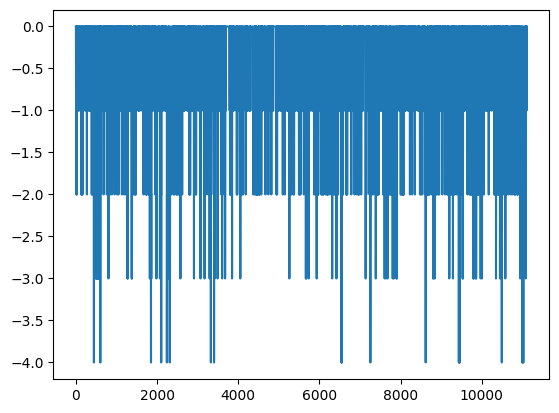

In [78]:
sns.lineplot(energy_hist)

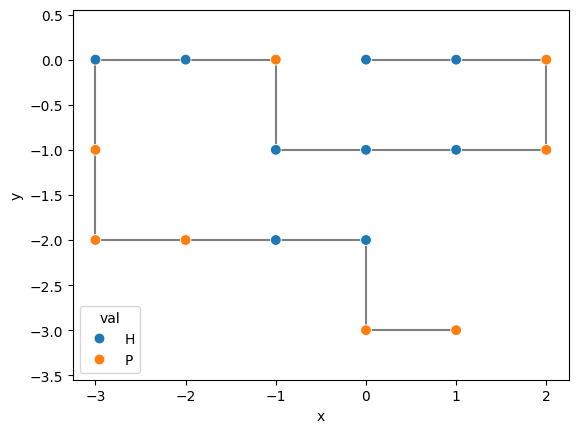

In [94]:
plot_data(best_chain, sequence)

In [95]:
calculate_energy(best_chain, sequence)

[0 0] [ 0 -1]
[1 0] [ 1 -1]
[ 0 -1] [ 0 -2]
[-1 -1] [-1 -2]


-4

In [91]:
for i in range(len(best_chain)):
    print(best_chain[i], sequence[i])

[0 0] H
[1 0] H
[2 0] P
[ 2 -1] P
[ 1 -1] H
[ 0 -1] H
[-1 -1] H
[-1  0] P
[-2  0] H
[-3  0] H
[-3 -1] P
[-3 -2] P
[-2 -2] P
[-1 -2] H
[ 0 -2] H
[ 0 -3] P
[ 1 -3] P


In [87]:
sequence

'HHPPHHHPHHPPPHHPP'

In [88]:
have_collision(best_chain)

False

In [89]:
len(best_chain)

17

[0 0] H
[1 0] H
[2 0] P
[ 2 -1] P
[ 1 -1] H
[ 0 -1] H
[-1 -1] H
[-1  0] P
[-2  0] H
[-3  0] H
[-3 -1] P
[-3 -2] P
[-2 -2] P
[-1 -2] H
[ 0 -2] H
[ 0 -3] P
[ 1 -3] P
